In [108]:
import csv
import re
import pandas as pd
import numpy as np
import math
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.stats import sigma_clip
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import matplotlib.cm as cm
import scipy.misc
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval,LinearStretch,ImageNormalize
get_ipython().magic('matplotlib inline')

In [109]:
def Scaleimgconverter(img):
    norm=ImageNormalize(img,interval=ZScaleInterval(),stretch=LinearStretch())
    return norm

In [110]:
def calculate_flux_density(mag):
    flux_density=10**((48.6+mag)/(-2.5))
    return flux_density

def calculate_intensity(mag,corresponding_lambda):
    flux_density=10**((48.6+mag)/(-2.5))
    intensity=(flux_density*3e8*1e10)/(corresponding_lambda**2)
    return intensity

def calculate_flux(mag,corresponding_lambda,delta_lambda):
    flux_density=10**((48.6+mag)/(-2.5))
    intensity=(flux_density*3e8*1e10)/(corresponding_lambda**2)
    flux=intensity*delta_lambda
    return flux

def calculate_distance(redshift):
    distance=redshift*3e5/70
    distance=distance*9.4607e17
    distance=distance*3.2616e6
    return(distance)

In [111]:
def calculate_continuum_flux_density(flux_bw,flux_nb,delta_lambda_bw,delta_lambda_nb):
    continuum_flux_density=(flux_bw-flux_nb)/(delta_lambda_bw-delta_lambda_nb)
    return continuum_flux_density

def calculate_continuum_subtracted_line_flux(flux_bw,flux_nb,delta_lambda_bw,delta_lambda_nb):
    continuum_flux_density=(flux_bw-flux_nb)/(delta_lambda_bw-delta_lambda_nb)
    continuum_subtracted_line_flux=flux_nb-continuum_flux_density*delta_lambda_nb
    return continuum_subtracted_line_flux

In [112]:
with open("BOSS1441_NB.csv",'w+',newline='') as csvfile:
    spamwriter = csv.writer(csvfile, dialect='excel')
    with open('nbcut1.cat','r',encoding = 'utf-8') as f:
        linelist = f.readlines()[13:]
        spamwriter.writerow(['NUMBER','X_IMAGE','Y_IMAGE','ALPHA_J2000','DELTA_J2000',\
                            'FLUX_APER','FLUXERR_APER','MAG_APER','MAGERR_APER ','FLAGS','NITER_MODEL','ISOAREA_IMAGE','ISOAREAF_IMAGE'])
        for line in linelist:
            line_list = line.strip('\n').split()
            spamwriter.writerow(line_list)

In [113]:
with open("BOSS1441_Bw.csv",'w+',newline='') as csvfile:
    spamwriter = csv.writer(csvfile, dialect='excel')
    with open('bwcut1.cat','r',encoding = 'utf-8') as f:
        linelist = f.readlines()[13:]
        spamwriter.writerow(['NUMBER','X_IMAGE','Y_IMAGE','ALPHA_J2000','DELTA_J2000',\
                            'FLUX_APER','FLUXERR_APER','MAG_APER','MAGERR_APER ','FLAGS','NITER_MODEL','ISOAREA_IMAGE','ISOAREAF_IMAGE'])
        for line in linelist:
            line_list = line.strip('\n').split()
            spamwriter.writerow(line_list)

In [114]:
SDSS6=pd.read_csv("SDSS6.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
BOSS1441_Bw=pd.read_csv("BOSS1441_Bw.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,12])
#index_col=False
BOSS1441_NB=pd.read_csv("BOSS1441_NB.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,12])

In [115]:
SDSS6=pd.concat([SDSS6,(SDSS6['umag']-0.8116*(SDSS6['umag'] - SDSS6['gmag']) + 0.1313)],axis=1)


SDSS6.columns=['_RAJ2000', '_DEJ2000',  'RA_ICRS',  'DE_ICRS',     'mode',   'q_mode',\
          'class',   'SDSS12', 'm_SDSS!2',  'ObsDate',        'Q',     'umag',\
         'e_umag',     'gmag',   'e_gmag',     'rmag',   'e_rmag',     'imag',\
         'e_imag',     'zmag',   'e_zmag',      'zsp',      'zph',    'e_zph',\
          '<zph>',          'bmag']


In [116]:
coord_sdss=SkyCoord(ra=SDSS6['_RAJ2000']*u.degree, dec=SDSS6['_DEJ2000']*u.degree)
coord_bw=SkyCoord(ra=BOSS1441_Bw['ALPHA_J2000']*u.degree, dec=BOSS1441_Bw['DELTA_J2000']*u.degree)
coord_nb=SkyCoord(ra=BOSS1441_NB['ALPHA_J2000']*u.degree, dec=BOSS1441_NB['DELTA_J2000']*u.degree)

In [117]:
idx, d2d, d3d = coord_sdss.match_to_catalog_sky(coord_bw)
index = np.where((d2d < Angle('0d00m0.5s'))&(SDSS6['bmag'] < 20)&(SDSS6['bmag'] > 16.5))
idx=idx[index]

SDSS6_RAJ2000=SDSS6._RAJ2000.data.obj
SDSS6_DEJ2000=SDSS6._DEJ2000.data.obj
SDSS6_bmag=SDSS6.bmag.data.obj
BOSS1441_Bw_list=BOSS1441_Bw.MAG_APER.data.obj
BOSS1441_Bw_list_standard=BOSS1441_Bw.MAG_APER.data.obj[idx]


/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.data is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [118]:
SDSS6_bmag_standard=SDSS6_bmag[index]
zeropoint_bw=SDSS6_bmag_standard-BOSS1441_Bw_list_standard
zeropoint_bw=sigma_clip(zeropoint_bw, sigma=3, iters=10)

Bw的zeropoint为 25.13518084
Bw的standard deviation为 0.06008385005900087


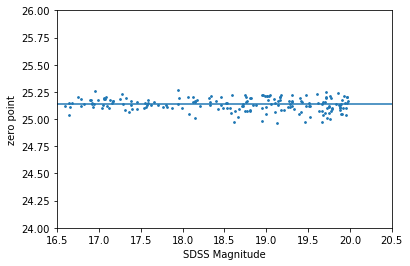

In [119]:
# zeropoint_bw.zeropoint_bw.data.obj
zp_bw=np.mean(zeropoint_bw)#Bw的zeropoint
zp_std_bw=np.std(zeropoint_bw)#Bw的standard deviation


print('Bw的zeropoint为',zp_bw)
print('Bw的standard deviation为',zp_std_bw)

plt.axhline(zp_bw)
plt.xlabel('SDSS Magnitude')
plt.ylabel('zero point')
plt.scatter(x=SDSS6_bmag_standard,y=zeropoint_bw,s=3)
plt.axis([16.5, 20.5, 24, 26])
plt.show()


In [120]:
BOSS1441_Bw=pd.concat([BOSS1441_Bw,BOSS1441_Bw.MAG_APER+zp_bw],axis=1)
BOSS1441_Bw.columns=['X_IMAGE','Y_IMAGE','ALPHA_J2000','DELTA_J2000','FLUX_APER','FLUXERR_APER','MAG_APER','MAGERR_APER ','FLAGS','NITER_MODEL','ISOAREA_IMAGE','ISOAREAF_IMAGE','standard_mag']

In [121]:
idx_nb, d2d_nb, d3d_nb = coord_nb.match_to_catalog_sky(coord_bw)
index_nb = np.where(d2d_nb < Angle('0d0m02s'))
idx_nb=idx_nb[index_nb]

In [122]:
BOSS1441_NB_match = BOSS1441_NB.MAG_APER.data.obj[index_nb]
#这是全部的可以与NB中对应成功的NB中的源的现在的nb_magnitude,包括galaxy和star
index_zp = np.where((BOSS1441_NB_match < 5) &(BOSS1441_NB_match > 0))
#这是全部可以用来计算zeropoint的NB的点

mid=BOSS1441_Bw.standard_mag.data.obj[idx_nb]
mag_bw_standard_select=mid[index_zp]#这里面写出来的则是与下面那个对应的bw中的标准的magnitude
mag_nb_standard_select=BOSS1441_NB_match[index_zp]#这里面写出来是标准的nb的magnitude

/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  


In [123]:
mag_nb_standard_select=sigma_clip(mag_nb_standard_select,sigma=1, iters=10)
zp_nb=np.mean(sigma_clip(mag_bw_standard_select-mag_nb_standard_select,sigma=1, iters=10))
zp_std_nb=np.std(sigma_clip(mag_bw_standard_select-mag_nb_standard_select,sigma=1, iters=10))

/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.data is deprecated and will be removed in a future version
  if __name__ == '__main__':


NB的zeropoint为 22.41070584
NB的standard deviation为 0.00391687056206996


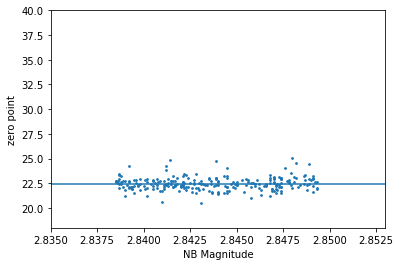

In [124]:
print('NB的zeropoint为',zp_nb)
print('NB的standard deviation为',zp_std_nb)

BOSS1441_NB=pd.concat([BOSS1441_NB,BOSS1441_NB.MAG_APER+zp_nb],axis=1)
BOSS1441_NB.columns=['X_IMAGE','Y_IMAGE','ALPHA_J2000','DELTA_J2000','FLUX_APER','FLUXERR_APER','MAG_APER','MAGERR_APER ','FLAGS','NITER_MODEL','ISOAREA_IMAGE','ISOAREAF_IMAGE','standard_mag']

BOSS1441_NB_match=BOSS1441_NB_match+zp_nb

b_nb=BOSS1441_Bw.standard_mag.data.obj[idx_nb]-BOSS1441_NB_match
mag_nb_draw=BOSS1441_NB_match

plt.axhline(zp_nb)
plt.xlabel('NB Magnitude')
plt.ylabel('zero point')
plt.scatter(x=mag_nb_standard_select,y=mag_bw_standard_select-mag_nb_standard_select,s=3)
plt.axis([2.835,2.853,18,40])
plt.show()


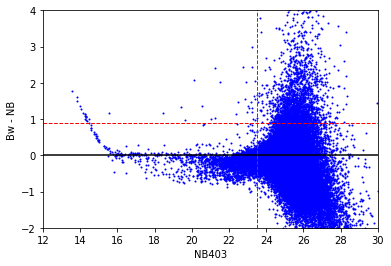

In [125]:
plt.scatter(mag_nb_draw, b_nb, color = 'b', s=1)
plt.axhline(0, color='k', linestyle='solid')
plt.axhline(0.9, color='r', linestyle='--', linewidth = 1)
plt.axvline(23.5, color='r', linestyle='--', linewidth = 1)
plt.axis([12,30,-2,4])
plt.xlabel('NB403')
plt.ylabel('Bw - NB')
plt.show()

In [126]:
BOSS1441_Bw_ALPHA=BOSS1441_Bw.ALPHA_J2000.data.obj[idx_nb]
BOSS1441_Bw_DELTA=BOSS1441_Bw.DELTA_J2000.data.obj[idx_nb]
BOSS1441_Bw_X_IMAGE=BOSS1441_Bw.X_IMAGE.data.obj[idx_nb]
BOSS1441_Bw_Y_IMAGE=BOSS1441_Bw.Y_IMAGE.data.obj[idx_nb]
BOSS1441_Bw_ISOAREAF_IMAGE=BOSS1441_Bw.ISOAREAF_IMAGE.data.obj[idx_nb]

BOSS1441_NB_ALPHA=BOSS1441_NB.ALPHA_J2000.data.obj[index_nb]
BOSS1441_NB_DELTA=BOSS1441_NB.DELTA_J2000.data.obj[index_nb]
BOSS1441_NB_X_IMAGE=BOSS1441_NB.X_IMAGE.data.obj[index_nb]
BOSS1441_NB_Y_IMAGE=BOSS1441_NB.Y_IMAGE.data.obj[index_nb]
BOSS1441_NB_ISOAREAF_IMAGE=BOSS1441_NB.ISOAREAF_IMAGE.data.obj[index_nb]


/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be rem

In [127]:
with open("BOSS1441_Bw.coord.reg",'w+',newline='') as txtfile:
    txtfile.write('# Region file format: DS9 version 4.1\n')
    txtfile.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
    txtfile.write('fk5\n')
    for i in range(len(idx_nb)):
        if (BOSS1441_Bw.standard_mag.data.obj[idx_nb][i]-BOSS1441_NB_match[i] > 0.9) \
        & (BOSS1441_NB_match[i]< 23.5):
            txtfile.write('circle(')
            txtfile.write(str(BOSS1441_Bw_ALPHA[i]))
            txtfile.write(',')
            txtfile.write(str(BOSS1441_Bw_DELTA[i]))
            txtfile.write(',2.821")\n')

/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  


In [128]:
with open("BOSS1441_NB.coord.reg",'w+',newline='') as txtfile:
    txtfile.write('# Region file format: DS9 version 4.1\n')
    txtfile.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
    txtfile.write('fk5\n')
    for i in range(len(idx_nb)):
        if (BOSS1441_Bw.standard_mag.data.obj[idx_nb][i]-BOSS1441_NB_match[i] > 0.9) \
        & (BOSS1441_NB_match[i]< 23.5):
            txtfile.write('circle(')
            txtfile.write(str(BOSS1441_NB_ALPHA[i]))
            txtfile.write(',')
            txtfile.write(str(BOSS1441_NB_DELTA[i]))
            txtfile.write(',2.821")\n')

/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  


In [129]:
BOSS1441_Bw_X_IMAGE_dubious=[]
BOSS1441_Bw_Y_IMAGE_dubious=[]
BOSS1441_Bw_RA_dubious=[]
BOSS1441_Bw_DEC_dubious=[]
BOSS1441_Bw_mag_dubious=[]
BOSS1441_Bw_AREA_dubious=[]

BOSS1441_NB_X_IMAGE_dubious=[]
BOSS1441_NB_Y_IMAGE_dubious=[]
BOSS1441_NB_RA_dubious=[]
BOSS1441_NB_DEC_dubious=[]
BOSS1441_NB_mag_dubious=[]
BOSS1441_NB_AREA_dubious=[]

for i in range(len(idx_nb)):
    if (BOSS1441_Bw.standard_mag.data.obj[idx_nb][i]-BOSS1441_NB_match[i] > 0.9) \
        & (BOSS1441_NB_match[i]< 23.5):
        BOSS1441_Bw_X_IMAGE_dubious.append(BOSS1441_Bw_X_IMAGE[i])
        BOSS1441_Bw_Y_IMAGE_dubious.append(BOSS1441_Bw_Y_IMAGE[i])
        BOSS1441_Bw_RA_dubious.append(BOSS1441_Bw_ALPHA[i])
        BOSS1441_Bw_DEC_dubious.append(BOSS1441_Bw_DELTA[i])
        BOSS1441_Bw_mag_dubious.append(BOSS1441_Bw.standard_mag.data.obj[idx_nb][i])
        BOSS1441_Bw_AREA_dubious.append(BOSS1441_Bw_ISOAREAF_IMAGE[i])
        
        BOSS1441_NB_X_IMAGE_dubious.append(BOSS1441_NB_X_IMAGE[i])
        BOSS1441_NB_Y_IMAGE_dubious.append(BOSS1441_NB_Y_IMAGE[i])
        BOSS1441_NB_RA_dubious.append(BOSS1441_NB_ALPHA[i])
        BOSS1441_NB_DEC_dubious.append(BOSS1441_NB_DELTA[i])
        BOSS1441_NB_mag_dubious.append(BOSS1441_NB_match[i])
        BOSS1441_NB_AREA_dubious.append(BOSS1441_NB_ISOAREAF_IMAGE[i])
    
print(BOSS1441_NB_AREA_dubious)

/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Series.data is deprecated and will be removed in a future version
  app.launch_new_instance()
/Users/jiangtianxiaoyubei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Series.data is deprecated and will be removed in a future version


[190, 115, 5079, 149, 29708, 178, 249, 702, 228, 6173, 98, 177, 349, 170, 222, 4529, 554, 1831, 4472, 4809, 161, 128, 8636, 13240, 4600, 176, 9588, 4378, 7769, 4718, 374, 648, 201, 267, 2688, 6190, 162, 515, 172, 114, 4675, 127, 1269, 4686, 10182]


In [130]:
#一个pixel的尺度是0.24999916 arcsec，近似为0.25 arcsec，则单个pixel的面积是0.062499580000706 arcsec^2，近似为0.0625arcsec^2
#假设判定是Layman-Alpha nebula的面积是25 arcsec^2
#那么一个layman-alpha nebula对应至少400个像素
#我们取900个，也就是30×30

In [131]:
w = WCS('bwcut.fits')
data,header=fits.getdata('bwcut.fits',header=True)
data2,header2=fits.getdata('nbcut.fits',header=True)
lenx=len(data[0])
leny=len(data)

datacut=10**((zp_bw - zp_nb)/2.5) * data2-data
norm = Scaleimgconverter(datacut)

In [132]:
def CountPixel(img, x, y, boundary, lenth = 30):
    x = x.astype(int)
    y = y.astype(int)
    img = img[(y - lenth):(y + lenth), (x - lenth):(x + lenth)]
    return len(np.where(img > boundary)[0])

x_select=[]
y_select=[]
ra_select=[]
dec_select=[]

for i in range(len(BOSS1441_NB_X_IMAGE_dubious)): 
    x,y=w.all_world2pix(BOSS1441_Bw_RA_dubious[i],BOSS1441_Bw_DEC_dubious[i],1) 
    if CountPixel(datacut,x,y,0.15,30)>150:
        x_select.append(x)
        y_select.append(y)
        ra_select.append(BOSS1441_NB_RA_dubious[i])
        dec_select.append(BOSS1441_NB_DEC_dubious[i])
        print('number:',i,' x_image:',x,' y_image:',y,' RA:',BOSS1441_NB_RA_dubious[i],' DEC',BOSS1441_NB_DEC_dubious[i])
        print('')
        
'''   
  

    print(CountPixel(datacut,x,y,0.15,30))
    print(x,y)
    print('')
'''

number: 4  x_image: 3128.506151144557  y_image: 413.49213656864595  RA: 220.34457450000002  DEC 39.754476399999994

number: 16  x_image: 3950.4953364542635  y_image: 2520.778568228723  RA: 220.2701367  DEC 39.900719

number: 17  x_image: 4672.532319341226  y_image: 2543.9727513535668  RA: 220.2049714  DEC 39.9021511

number: 22  x_image: 4581.345880349696  y_image: 3134.9136781641987  RA: 220.21293109999996  DEC 39.9433202

number: 23  x_image: 6538.614604337725  y_image: 3158.038214568407  RA: 220.03564139999997  DEC 39.9444299

number: 28  x_image: 6641.992124963405  y_image: 3687.2802864305345  RA: 220.0260386  DEC 39.981115

number: 31  x_image: 2618.704433267796  y_image: 4361.618575072359  RA: 220.39059440000003  DEC 40.0286453

number: 34  x_image: 3048.5824764839367  y_image: 4714.062979274522  RA: 220.3514259  DEC 40.0529253

number: 35  x_image: 5282.567969576141  y_image: 4721.185053396312  RA: 220.1489125  DEC 40.0532789

number: 42  x_image: 5634.408767303162  y_image: 678

"   \n  \n\n    print(CountPixel(datacut,x,y,0.15,30))\n    print(x,y)\n    print('')\n"

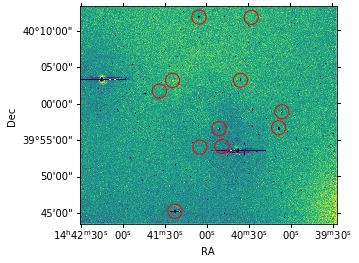

<Figure size 432x288 with 0 Axes>

In [133]:
ax = plt.subplot(projection=WCS(header))
fig = plt.figure()
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(datacut, origin='lower',norm=norm,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')
ax.scatter(x_select, y_select, color='', marker='o', edgecolors='r', s=200)

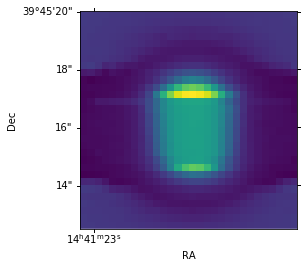

In [134]:
center=[np.array([x_select[0]],float),np.array([y_select[0]],float)]

size=30
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

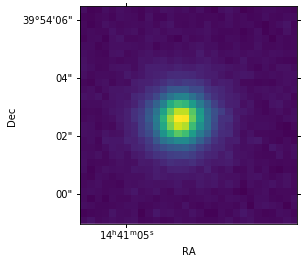

In [135]:
center=[np.array([x_select[1]],float),np.array([y_select[1]],float)]

size=30
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

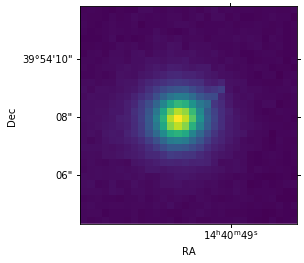

In [136]:
center=[np.array([x_select[2]],float),np.array([y_select[2]],float)]

size=30
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

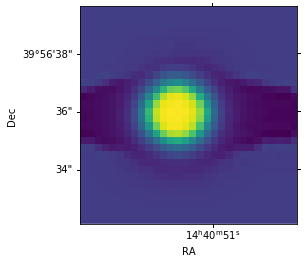

In [137]:
center=[np.array([x_select[3]],float),np.array([y_select[3]],float)]

size=30
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

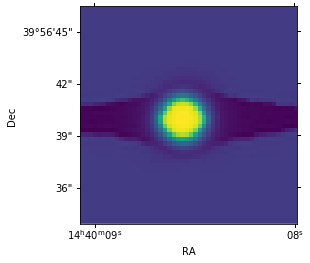

In [138]:
center=[np.array([x_select[4]],float),np.array([y_select[4]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

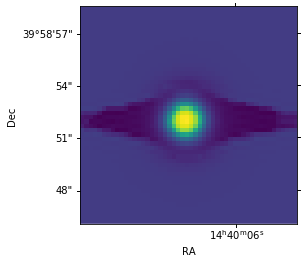

In [139]:
center=[np.array([x_select[5]],float),np.array([y_select[5]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

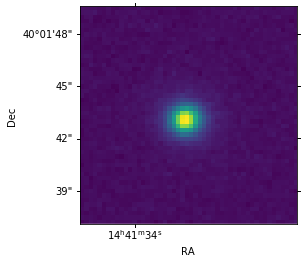

In [140]:
center=[np.array([x_select[6]],float),np.array([y_select[6]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

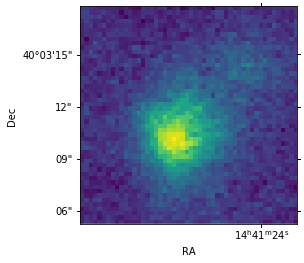

In [141]:
center=[np.array([x_select[7]],float),np.array([y_select[7]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

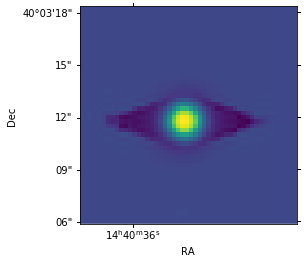

In [142]:
center=[np.array([x_select[8]],float),np.array([y_select[8]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

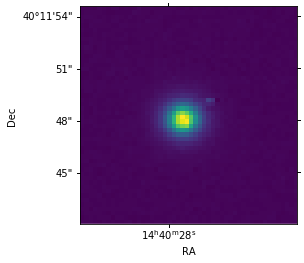

In [143]:
center=[np.array([x_select[9]],float),np.array([y_select[9]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

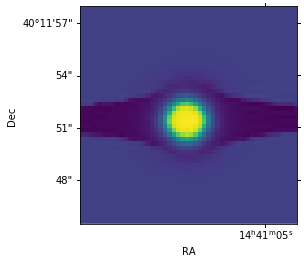

In [144]:
center=[np.array([x_select[10]],float),np.array([y_select[10]],float)]

size=50
cutout=Cutout2D(datacut, center, size, wcs = WCS(header))

fig = plt.figure()
ax = plt.subplot(projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data,cmap=plt.cm.viridis)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')